In [1]:
%load_ext autoreload
%autoreload 2

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
%%bash
git branch -v 

* emulate_z bce8acd Behold, a functioning version of SB
  master    2f632ff Figured out the source of that dumb averaging thing.


In [3]:
from pearce.emulator import OriginalRecipe, ExtraCrispy, SpicyBuffalo
from pearce.emulator import parameter, DEFAULT_PARAMS as PARAMS

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from itertools import cycle
colors = cycle(sns.color_palette())

In [5]:
training_dir = '/u/ki/swmclau2/des/PearceLHC_wp_z/'
fiducial_params = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02,
                      'logMmin': 12.1, 'f_c': 0.19, 'sigma_logM': 0.46}
rbins = np.array([  0.06309573,   0.12437607,   0.24517359,   0.34422476, 0.48329302, 0.67854546,\
           0.9526807 , 1.33756775,1.8779508 ,   2.6366509 ,   3.70186906,   5.19743987, 7.29722764, \
           10.24533859,  14.38449888,  20.1958975 , 28.35512583,  39.81071706] )
rpoints = (rbins[1:]+rbins[:-1])/2

In [6]:
y_param = 'z'
emulation_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.533), 
                   ('alpha', 1.083),('logM1', 13.5), ('logMmin', 12.233), ('z', 0.0)]
em_params = dict(emulation_point)
try:
    del em_params[y_param]
except KeyError:
    pass

In [7]:
or_params = PARAMS[:]
or_params.append(parameter('z', 0.0, 0.5))
or_params.append(parameter('r', 0, 1)) #95% sure bounds aren't used for r

In [8]:
y_param_idx = -1
for idx, p in enumerate(or_params):
    if p.name==y_param:
        y_param_idx = idx
        break
        
y_vals = np.linspace(or_params[y_param_idx].low, or_params[y_param_idx].high, 4)
em_params[y_param] = y_vals

In [9]:
print em_params[y_param]

[ 0.          0.16666667  0.33333333  0.5       ]


In [10]:
print len(em_params)

7


In [11]:
emu1 = OriginalRecipe(training_dir,params=or_params)

In [12]:
rpoints = np.logspace(np.log10(rbins[1]), np.log10(rbins[-2]), 10)
log_xi_pred= emu1.emulate_wrt_r(em_params, rpoints)
#log_xi_cov = np.zeros((log_xi_pred.shape[0], log_xi_pred.shape[0]))
#log_xi_err = np.sqrt(np.diag(log_xi_cov))
#log_xi_pred = log_xi_pred.reshape((-1, len(rpoints)))
#log_xi_err = log_xi_err.reshape((-1, len(rpoints)))
log_xi_err = np.zeros_like(log_xi_pred)

Mu r (1, 4, 10)


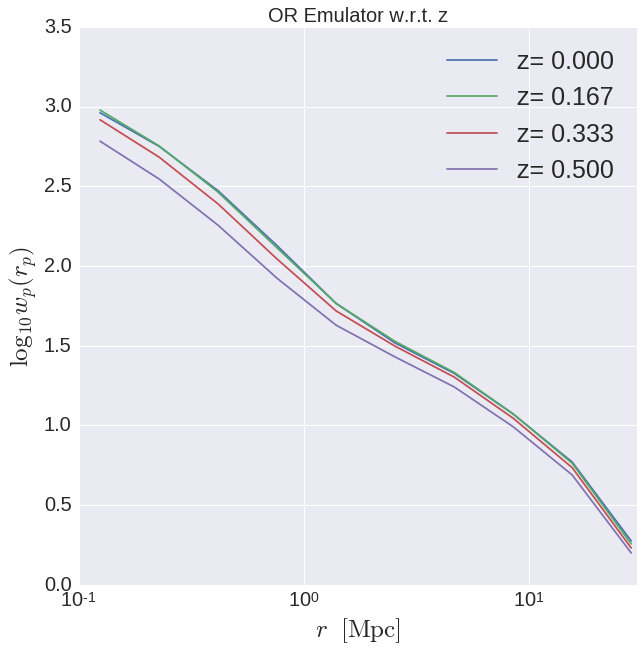

In [13]:
fig = plt.figure(figsize = (10, 10))
for label, lxp, lxe,c in zip(y_vals, log_xi_pred, log_xi_err ,colors):

    plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )

    plt.fill_between(rpoints,lxp+lxe,
                     lxp-lxe, color = c, alpha = 0.3)

plt.xlim(xmin = 0.1, xmax = 30)    
plt.ylim(ymin = 0, ymax = 3.5)
plt.title("OR Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\log_{10}{w_p(r_p) }$', fontsize=25)
plt.legend(loc='best', fontsize=25)

In [14]:
em_params

{'alpha': 1.083,
 'f_c': 0.233,
 'logM0': 12.0,
 'logM1': 13.5,
 'logMmin': 12.233,
 'sigma_logM': 0.533,
 'z': array([ 0.        ,  0.16666667,  0.33333333,  0.5       ])}

In [15]:
emu2 = ExtraCrispy(training_dir)#no r in params

In [16]:
log_xi_pred = emu2.emulate_wrt_r(em_params,rpoints)
#log_xi_cov = np.zeros((log_xi_pred.shape[0], log_xi_pred.shape[0]))
#log_xi_err = np.sqrt(np.diag(log_xi_cov))
#print log_xi_pred
#log_xi_pred = log_xi_pred.reshape((-1, len(rpoints)))
#log_xi_err = log_xi_err.reshape((-1, len(rpoints)))
log_xi_err = np.zeros(log_xi_pred.shape)

mu (34,)
All Mu (1, 2, 17)
Mu r (4, 10)


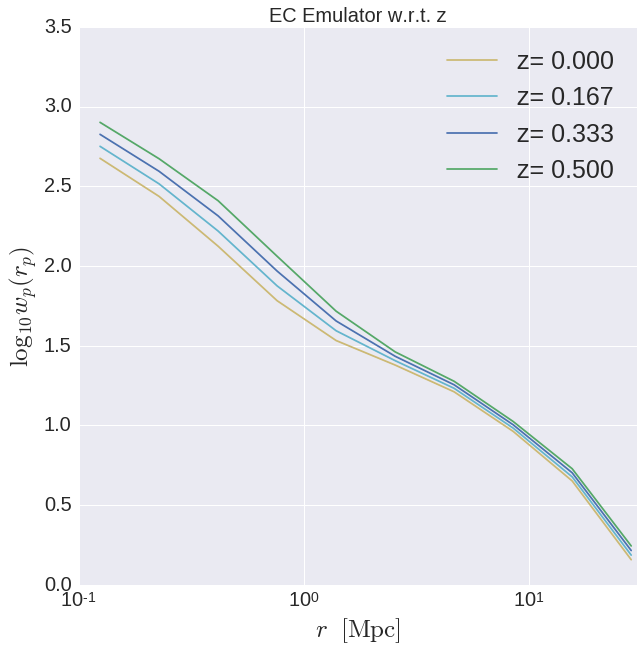

In [17]:
fig = plt.figure(figsize = (10, 10))
for label, lxp, lxe,c in zip(y_vals, log_xi_pred, log_xi_err ,colors):

    #plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )
    plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )

    plt.fill_between(rpoints,lxp+lxe,
                     lxp-lxe, color = c, alpha = 0.3)

plt.xlim(xmin = 0.1, xmax = 30)    
plt.ylim(ymin = 0, ymax = 3.5)
plt.title("EC Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\log_{10}{w_p(r_p) }$', fontsize=25)
plt.legend(loc='best', fontsize=25)

In [18]:
or_params = PARAMS[:]
or_params.append(parameter('z', 0.0, 0.5))
#or_params.append(parameter('r', 0, 1)) #95% sure bounds aren't used for r
emu3 = SpicyBuffalo(training_dir, em_param = 'z', params = or_params)#no r in params

In [19]:
log_xi_pred = emu3.emulate_wrt_r(em_params,rpoints)
#log_xi_cov = np.zeros((log_xi_pred.shape[0], log_xi_pred.shape[0]))
#log_xi_err = np.sqrt(np.diag(log_xi_cov))
#print log_xi_pred
#log_xi_pred = log_xi_pred.reshape((-1, len(rpoints)))
#log_xi_err = log_xi_err.reshape((-1, len(rpoints)))
log_xi_err = np.zeros(log_xi_pred.shape)

Mu r (4, 10)


In [20]:
print log_xi_pred.shape

(4, 10)


In [21]:
print log_xi_pred[0, :]

[ 2.97313756  2.75431953  2.47350002  2.1297015   1.77403806  1.52299974
  1.33314048  1.07114362  0.76844783  0.28217442]


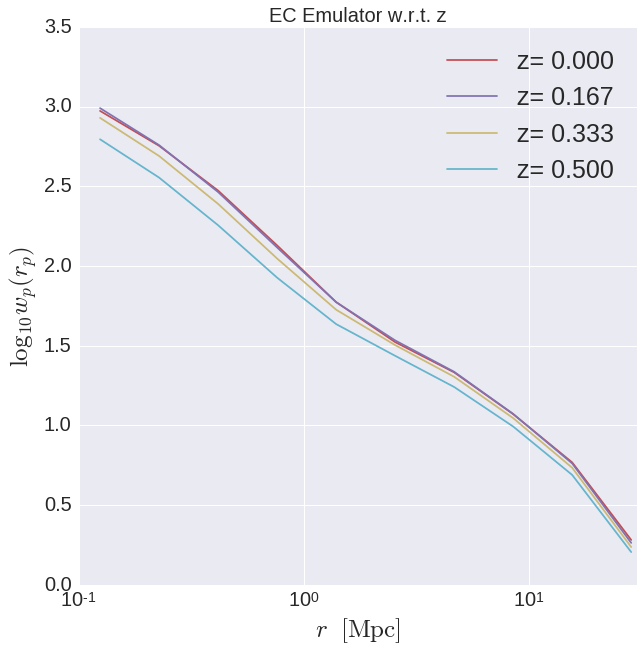

In [22]:
fig = plt.figure(figsize = (10, 10))
for label, lxp, lxe,c in zip(y_vals, log_xi_pred, log_xi_err ,colors):

    #plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )
    plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )

    plt.fill_between(rpoints,lxp+lxe,
                     lxp-lxe, color = c, alpha = 0.3)

plt.xlim(xmin = 0.1, xmax = 30)    
plt.ylim(ymin = 0, ymax = 3.5)
plt.title("EC Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\log_{10}{w_p(r_p) }$', fontsize=25)
plt.legend(loc='best', fontsize=25)